In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io


# Image read and write/save image using [scikit-image](https://scikit-image.org/)

For installation please go through: https://scikit-image.org/docs/stable/user_guide/install.html

# <font color='red'>Warning: Please do not use the command sudo and pip together as pip may overwrite critical system libraries which may require you to reinstall your operating system.</font>


band1 image size: (512, 512)


/home/sysadm/.local/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


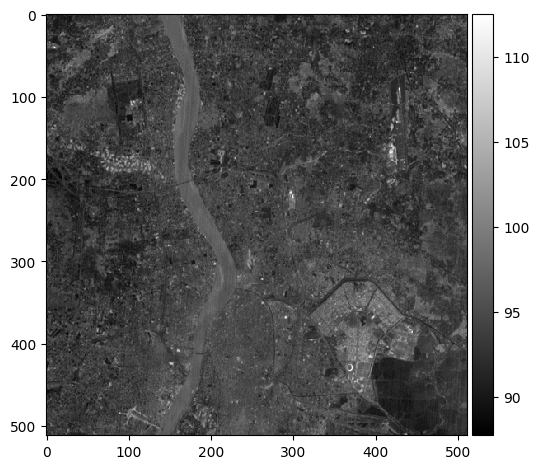

In [2]:
# IMAGE FILE NAME YOU WANT TO READ
img_filename = '/home/sysadm/Debayan_BDA/ML/ML_Assignments/Assignment2_NBC/band1.gif'

img = plt.imread(img_filename).astype('double').mean(axis=2)

print('band1 image size: {}' .format(img.shape))

# DISPLAY
io.imshow(img, cmap='gray')
io.show()


In [8]:
import pandas as pd

In [9]:
B1 = plt.imread('band1.gif').astype('double').mean(axis=2)
B2 = plt.imread('band2.gif').astype('double').mean(axis=2)
B3 = plt.imread('band3.gif').astype('double').mean(axis=2)
B4 = plt.imread('band4.gif').astype('double').mean(axis=2)

_______________________________________________________
### Getting coordinates for River points and finding intensity

In [10]:
river_points = pd.read_csv('/home/sysadm/Debayan_BDA/ML/ML_Assignments/Assignment2_NBC/annotated_points_band4_np_50.csv')
print(river_points.head())

   row  column
0   10     156
1   25     160
2   40     164
3   54     171
4   73     172


In [22]:
# Iterate over each row in the DataFrame

intensity_values = []

for index, row in river_points.iterrows():
    x, y = int(row['row']), int(row['column'])
    # Get intensity values at the specified coordinates from each band
    intensity_values.append([B1[x,y], B2[x,y], B3[x,y], B4[x,y]])


# Convert intensity_values to NumPy array
intensity_values_of_river = np.array(intensity_values)

print(intensity_values_of_river.shape)
print(intensity_values_of_river[:5])


(50, 4)
[[97.5  86.25 87.75 79.5 ]
 [96.75 86.25 87.   79.5 ]
 [96.75 86.25 87.75 79.5 ]
 [96.75 86.25 87.   79.5 ]
 [96.75 86.25 87.75 79.5 ]]


In [50]:
river_label = np.array([255]*intensity_values_of_river.shape[0]) 
print(river_label)

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255]


_______________________________________________________
### Getting coordinates for Non-River points and finding intensity

In [13]:
non_river_points = pd.read_csv('/home/sysadm/Debayan_BDA/ML/ML_Assignments/Assignment2_NBC/annotated_points_band4_np_150.csv')
print(non_river_points.head())

   row  column
0   18      15
1   20      32
2   20      71
3   27     119
4   50      89


In [21]:
# Iterate over each row in the DataFrame

intensity_values = []

for index, row in non_river_points.iterrows():
    x, y = int(row['row']), int(row['column'])
    # Get intensity values at the specified coordinates from each band
    intensity_values.append([B1[x,y], B2[x,y], B3[x,y], B4[x,y]])

# Convert intensity_values to NumPy array
intensity_values_of_non_river = np.array(intensity_values)

print(intensity_values_of_non_river.shape)
print(intensity_values_of_non_river[0:5])



(150, 4)
[[90.75 80.25 78.75 91.5 ]
 [92.25 81.75 82.5  93.75]
 [97.5  85.5  85.5  94.5 ]
 [93.75 84.   84.   96.75]
 [92.25 81.75 82.5  90.75]]


In [47]:
non_river_label = np.array([0]*intensity_values_of_non_river.shape[0]) 
print(non_river_label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


____________________________
#### Compute mean value and Covariance matrix for both the classes

In [28]:
# For River class

mean_river= np.mean(intensity_values_of_river,axis=0) #take each column(Band) and find its mean
print(mean_river,"\n")

variance_river = np.cov(intensity_values_of_river, rowvar=False)
print(variance_river)

[95.475 84.705 85.11  79.515] 

[[ 6.1817602   6.62257653  9.47984694  2.7057398 ]
 [ 6.62257653  7.49410714 10.68107143  2.83614796]
 [ 9.47984694 10.68107143 15.84734694  4.54040816]
 [ 2.7057398   2.83614796  4.54040816  3.84543367]]


In [29]:
# For Non-River class

mean_non_river= np.mean(intensity_values_of_non_river,axis=0) #take each column(Band) and find its mean
print(mean_non_river,"\n")

variance_non_river = np.cov(intensity_values_of_non_river, rowvar=False)
print(variance_non_river)

[94.08  82.87  83.55  89.535] 

[[ 4.0883557   3.48991611  4.38145973  1.40783557]
 [ 3.48991611  3.59204698  4.23347315  2.99325503]
 [ 4.38145973  4.23347315  6.73489933  1.65050336]
 [ 1.40783557  2.99325503  1.65050336 19.00925336]]


____________________________________
#### get the distribution value (mulivariate) for both the classes

In [38]:
# forming the multivariate normal pdf

def multi_normal(z,mean,sigma):                                             # sigma is the var covar matrix
    n = len(z)         # no. of features = 4 here B1 to B4

    sigma_inv = np.linalg.inv(sigma)
    sigma_det = np.linalg.det(sigma)
    exp_part = np.dot(  np.dot((z-mean).T , sigma_inv)   , (z-mean) )       #(x-u)T * Sigma_inv * (x-u)
    
    pdf_value = np.exp(-0.5*exp_part) / np.sqrt( (2 * np.pi)**n * sigma_det)
    return pdf_value

In [36]:
# intensity matrix: flattened all bands, and column stack applied

intensity_matrix = np.column_stack((B1.flatten(), B2.flatten(), B3.flatten(),B4.flatten()))

print(intensity_matrix.shape)               # 512*512 = 262144

(262144, 4)


In [39]:
x=[]

prior_river = 50/200            # prior probabilities
prior_non_river = 150/200

for i in intensity_matrix:
    
    post_river = prior_river * multi_normal(i, mean_river, variance_river)     # posterior probability
    post_non_river = prior_non_river * multi_normal(i, mean_non_river, variance_non_river)

    if post_river <= post_non_river:
        x.append(0)
    else:
        x.append(255)

final = np.array(x).reshape(512,512)

print(final.shape)
print(final)


(512, 512)
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0 255]
 [  0   0   0 ...   0   0 255]]


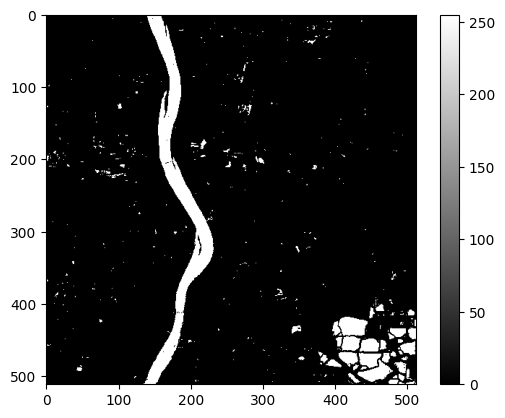

In [40]:
plt.imshow(final, cmap='gray')
plt.colorbar()
plt.show()

__________________________
#### Confusion Matrix

In [48]:
all_points = pd.concat([river_points, non_river_points])
print(all_points)

     row  column
0     10     156
1     25     160
2     40     164
3     54     171
4     73     172
..   ...     ...
145  211     259
146  233     255
147  269     282
148  310     288
149  363     290

[200 rows x 2 columns]


In [55]:
predict_label = final[all_points['row'],all_points['column']]
print(predict_label)
print(predict_label.shape)


[255 255 255 255 255   0 255   0 255 255 255 255 255 255 255 255 255 255
 255 255 255   0 255   0 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(200,)


In [56]:
actual_label = np.concatenate((river_label,non_river_label))
print(actual_label)
print(actual_label.shape)

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(200,)


In [57]:
TP, TN, FP, FN = 0,0,0,0

for i in range(200):
    if predict_label[i]==255 and actual_label[i]==255:
        TP += 1
    if predict_label[i]==0 and actual_label[i]==0:
        TN += 1    
    if predict_label[i]==255 and actual_label[i]==0:
        FP += 1
    if predict_label[i]==0 and actual_label[i]==255:
        FN += 1

confusion_mat = [[TP,FP],[FN,TN]]
confusion_mat = pd.DataFrame(confusion_mat)
print(confusion_mat)

    0    1
0  46    1
1   4  149


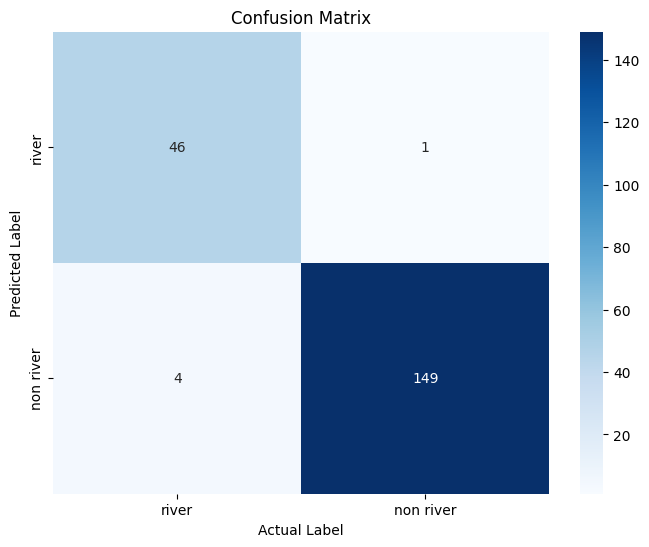

In [62]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=['river','non river'],yticklabels=['river','non river'])
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()